<a href="https://colab.research.google.com/github/berdaulet998-star/dap-2024/blob/main/%22IT_Salary_Prediction_ipynb%22%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорт библиотек

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_squared_error,r2_score

Загрузка и просмотр данных

In [ ]:
import numpy as np

np.random.seed(42)

df = pd.DataFrame({
    'experience_years': np.random.randint(0, 15, 1000),
    'education_level': np.random.choice(['Bachelor', 'Master', 'PhD'], 1000),
    'job_title': np.random.choice(['Frontend', 'Backend', 'Data Scientist'], 1000),
    'skills_count': np.random.randint(1, 15, 1000),
    'certifications': np.random.randint(0, 5, 1000),
    'city': np.random.choice(['Almaty', 'Astana', 'Remote'], 1000),
    'remote_work': np.random.choice([0, 1], 1000),
    'company_size': np.random.choice(['Small', 'Medium', 'Large'], 1000),
    'salary': np.random.randint(800, 6000, 1000)
})



EDA

Распределение зарплат и стажа

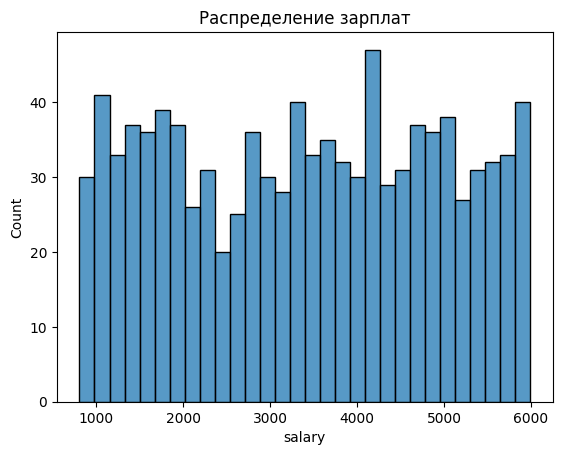

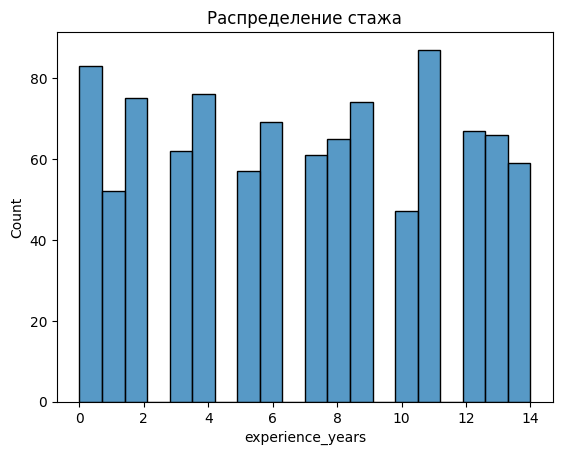

In [ ]:
plt.figure()
sns.histplot(df['salary'], bins=30)
plt.title("Распределение зарплат")
plt.show()

plt.figure()
sns.histplot(df['experience_years'], bins=20)
plt.title("Распределение стажа")
plt.show()


Зарплата по должности

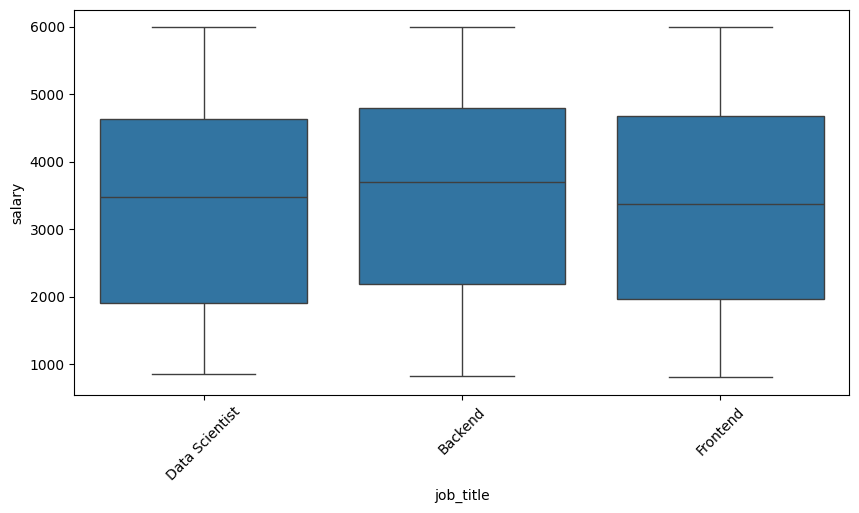

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='job_title', y='salary', data=df)
plt.xticks(rotation=45)
plt.show()


Навыки vs зарплата

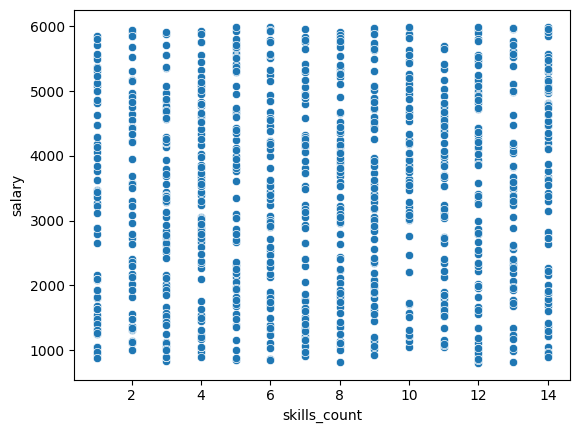

In [ ]:
plt.figure()
sns.scatterplot(x='skills_count', y='salary', data=df)
plt.show()


Корреляционная матрица

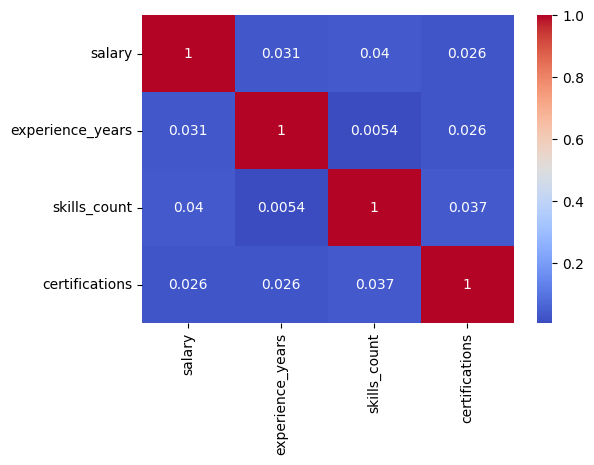

In [ ]:
num_cols = ['salary', 'experience_years', 'skills_count', 'certifications']

plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.show()


Пропуски

In [ ]:
df.fillna({
    'experience_years': df['experience_years'].median(),
    'skills_count': df['skills_count'].median(),
    'certifications': df['certifications'].median(),
    'education_level': 'Unknown',
    'job_title': 'Unknown',
    'city': 'Unknown',
    'company_size': 'Unknown'
}, inplace=True)


Удаление выбросов зарплат (top 2%)

In [ ]:
q = df['salary'].quantile(0.98)
df = df[df['salary'] <= q]


Feature Engineering

In [ ]:
df['salary_per_skill'] = df['salary'] / df['skills_count']
df['is_senior'] = (df['experience_years'] > 5).astype(int)


Визуализация после обработки

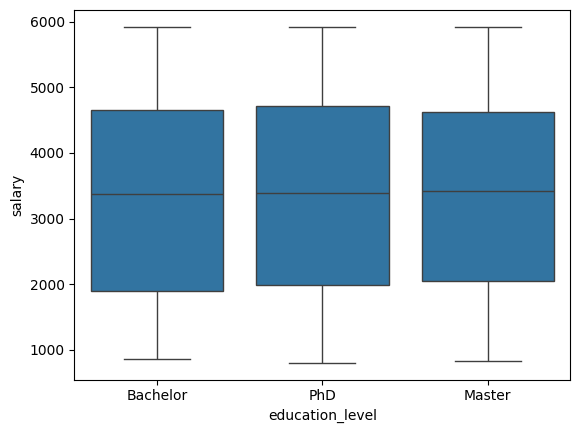

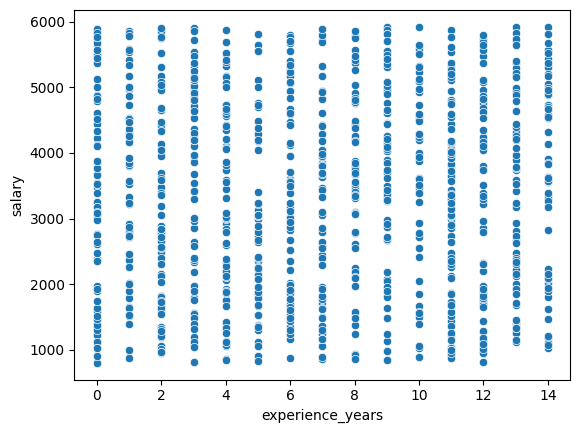

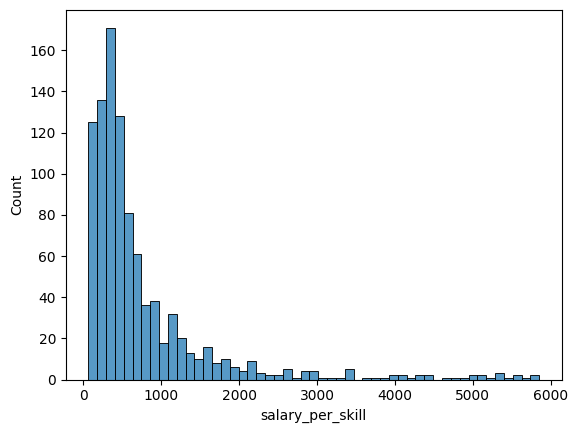

In [ ]:
sns.boxplot(x='education_level', y='salary', data=df)
plt.show()

sns.scatterplot(x='experience_years', y='salary', data=df)
plt.show()

sns.histplot(df['salary_per_skill'])
plt.show()


Машинное обучение

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']

cat_features = ['education_level', 'job_title', 'city', 'company_size']
num_features = ['experience_years', 'skills_count', 'certifications',
                'remote_work', 'salary_per_skill', 'is_senior']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features),
    ('num', 'passthrough', num_features)
])


Модели
Linear Regression

In [ ]:
model_lr = Pipeline([
    ('prep', preprocessor),
    ('model', LinearRegression())
])


Random Forest

In [ ]:
model_rf = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])


Gradient Boosting

In [ ]:
model_gb = Pipeline([
    ('prep', preprocessor),
    ('model', GradientBoostingRegressor(random_state=42))
])


Обучение и оценка

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    mse = mean_squared_error(y_test, preds)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, preds)

    print(f"{name}: RMSE = {rmse:.2f}, R2 = {r2:.2f}")



Linear Regression: RMSE = 1291.54, R2 = 0.23
Random Forest: RMSE = 167.81, R2 = 0.99
Gradient Boosting: RMSE = 190.36, R2 = 0.98
